In [3]:
%%capture
%pip install unsupervised_multimodal_trajectory_modeling

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/burkh4rt/Unsupervised-Trajectory-Clustering-Starter/blob/ipynb/inference_synthetic_nonlinear.ipynb)
## Example scripts for nonlinear versions of our framework

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


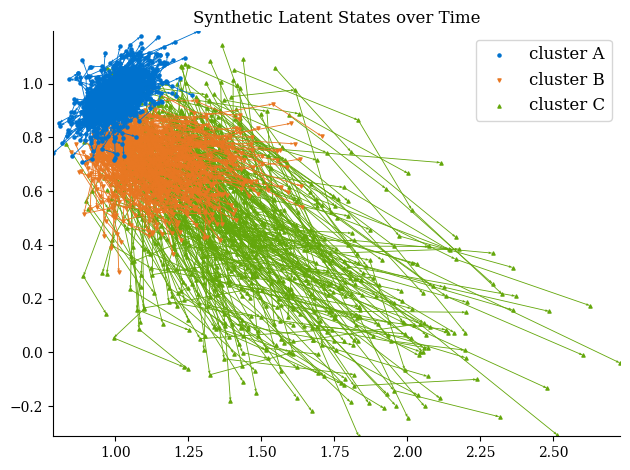

In [1]:
import pathlib
import string

import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as skl_mets

from unsupervised_multimodal_trajectory_modeling.nonlinear import (
    state_space_model_mixture as mixmodel_nl,
    StateSpaceKNN as ss_knn,
    StateSpaceHybrid as ss_hybrid,
)
from unsupervised_multimodal_trajectory_modeling.util import (
    util_state_space as util,
)

%run data_synthetic.ipynb

plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.loc"] = "upper right"
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 12

pwd = pathlib.Path().absolute()
alpha = 1.0
n_clusters = 3

In [2]:
# gather and process datasets
ztrain_orig, xtrain, ctrain, *_ = get_data(1000, rng=np.random.default_rng(42))
ztrain, std_param = util.standardize(ztrain_orig, return_params=True)

ztest_orig, xtest, ctest, *_ = get_data(1000, rng=np.random.default_rng(0))
ztest = util.standardize(ztest_orig, params=std_param)

for model_spec in [ss_knn, ss_hybrid]:
    print(model_spec())

    # train mixture model
    best_mdl = mixmodel_nl.StateSpaceMixtureModel(
        n_clusters=n_clusters,
        data=(ztrain, xtrain),
        component_model=model_spec,
        # k-means-all doesn't make sense for trajectories
        # of differing lengths
    ).fit(init="kmeans", n_iter=10, use_cache=True)
    set_model_correspondence(best_mdl, ctrain)

    # test model on full data
    print("Confusion matrix |".ljust(79, "-"))
    print(
        skl_mets.confusion_matrix(
            np.array(list(string.ascii_uppercase))[ctest],
            best_mdl.predict(data=(ztest, xtest)),
        )
    )

State space model with k-NN-based components
Confusion matrix |-------------------------------------------------------------
[[370   1   0]
 [  0 301   5]
 [  0   0 323]]
State space model with linear state model and k=[10]-NN-based measurement model (self.n_folds=3, self.alpha=0)
Confusion matrix |-------------------------------------------------------------
[[371   0   0]
 [  0 302   4]
 [  0   0 323]]
